# Homework 8
## Maryam Asghari 

Download at least 200 Pubmed articles (abstract, title or whatever you prefer). 100 should
include the term “obesity” and the other 100 should include the term “cancer”.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

import re
import string
from langdetect import detect
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
import unicodedata

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from bs4 import BeautifulSoup

import os

import plotly.io as plt_io
import plotly.graph_objects as go
%matplotlib inline

## 100 document with keyword : "obesity"

In [58]:
from pymed import PubMed
pubmed = PubMed(tool="PubMedSearcher")

search_term = "obesity"
results = pubmed.query(search_term, max_results=100)
articleList = []
articleInfo = []

for article in results:
# We need to convert it to dictionary
    articleDict = article.toDict()
    articleList.append(articleDict)

# Generate list of dict records which will hold all article details that could be fetch from PUBMED API
for article in articleList:
#Sometimes article['pubmed_id'] contains list separated with comma - take first pubmedId in that list - thats article pubmedId
    pubmedId = article['pubmed_id'].partition('\n')[0]
    # Append article info to dictionary 
    articleInfo.append({u'pubmed_id':pubmedId,
                       u'title':article['title'],
                       u'abstract':article['abstract'],
                       u'target':search_term})

# Generate DataFrame from list of dictionaries
articlesPD = pd.DataFrame.from_dict(articleInfo)

#Print first 10 rows 
print(articlesPD.head(10))

  pubmed_id                                              title  \
0  33862466  High-mobility group box 2 protein is essential...   
1  33862459  Gut microbial short-chain fatty acids-mediated...   
2  33862414  Kidney cancer mortality disparities among Hisp...   
3  33862377  Effects of locomotion task constraints on runn...   
4  33862325  Multimodal brain predictors of current weight ...   
5  33862225  Maternal and perinatal risk factors for pediat...   
6  33862221  AMPK signaling and its targeting in cancer pro...   
7  33862146  Association of metabolites with obesity based ...   
8  33862034  Metabolically healthy obesity increases the pr...   
9  33862029  Converging vulnerability factors for compulsiv...   

                                            abstract   target  
0  Understanding of the mechanism of adipogenesis...  obesity  
1  Olfactory receptor 78 (Olfr78), which is also ...  obesity  
2  Kidney cancer incidence is increasing among Hi...  obesity  
3  Childhood obes

In [85]:
articlesPD.shape

(200, 8)

## 100 document with keyword : "Cancer"

In [67]:
search_term = "Cancer"
results = pubmed.query(search_term, max_results=100)
articleList = []
articleInfo = []

for article in results:
# Print the type of object we've found (can be either PubMedBookArticle or PubMedArticle).
# We need to convert it to dictionary with available function
    articleDict = article.toDict()
    articleList.append(articleDict)

# Generate list of dict records which will hold all article details that could be fetch from PUBMED API
for article in articleList:
#Sometimes article['pubmed_id'] contains list separated with comma - take first pubmedId in that list - thats article pubmedId
    pubmedId = article['pubmed_id'].partition('\n')[0]
    # Append article info to dictionary 
    articleInfo.append({u'pubmed_id':pubmedId,
                       u'title':article['title'],
                       u'abstract':article['abstract'],
                        u'target':search_term})

# Generate Pandas DataFrame from list of dictionaries
articlesPD2 = pd.DataFrame.from_dict(articleInfo)
#export_csv = df.to_csv (r'C:\Users\YourUsernam\Desktop\export_dataframe.csv', index = None, header=True) 

#Print first 10 rows of dataframe
print(articlesPD2.head(10))

  pubmed_id                                              title  \
0  33862674  The Relationship Between Amount of Extra-prost...   
1  33862663  vHTS and 3D-QSAR for the Identification of Nov...   
2  33862656  Choking with a snare to control immediate blee...   
3  33862653  A new therapy for refractory gastric cancer bl...   
4  33862649  [Heidelberg Milestones Communication (HeiMeKOM...   
5  33862637  Review of Approaches to Developing Intersegmen...   
6  33862622  A Systematic Review of Minimally Invasive Proc...   
7  33862619  Re-evaluating Biopsy for Recurrent Glioblastom...   
8  33862616  An approach for estimating dosimetric uncertai...   
9  33862601  Dosimetric analysis of cervical cancer stage I...   

                                            abstract  target  
0  In prostate cancer, extraprostatic extension (...  Cancer  
1  Farnesyltransferase (FTase) is a zinc enzyme t...  Cancer  
2                                               None  Cancer  
3                    

In [68]:
articlesPD2.shape

(100, 4)

In [69]:
articlesPD = articlesPD.append(articlesPD2)

In [70]:
articlesPD.shape

(200, 4)

## Analyze their textual corpus in a way that we can feed them into a dimensionality reduction method.

In [71]:
from nltk.corpus import stopwords 
from bs4 import BeautifulSoup

stop_words = set(stopwords.words('english') + stopwords.words('spanish'))

lemmer = WordNetLemmatizer()

def preprocess(x):
    x = str(x)
    # Lower case
    x = x.lower()
    
    # Remove punctuation
    x = re.sub(r'[^\w\s]', '', x)
    
    # Remove numbers
    x = re.sub(r'\d+', '', x)
    
    # Remove stopwords and lemmatize
    x = [lemmer.lemmatize(w) for w in x.split() if w not in stop_words]
    return ' '.join(x) 


In [72]:
articlesPD['title_clean'] = articlesPD['title'].apply(preprocess)
articlesPD['abstract_clean'] = articlesPD['abstract'].apply(preprocess)
articlesPD.head()

pubmed_id                                              title  \
0  33862466  High-mobility group box 2 protein is essential...   
1  33862459  Gut microbial short-chain fatty acids-mediated...   
2  33862414  Kidney cancer mortality disparities among Hisp...   
3  33862377  Effects of locomotion task constraints on runn...   
4  33862325  Multimodal brain predictors of current weight ...   

                                            abstract   target  \
0  Understanding of the mechanism of adipogenesis...  obesity   
1  Olfactory receptor 78 (Olfr78), which is also ...  obesity   
2  Kidney cancer incidence is increasing among Hi...  obesity   
3  Childhood obesity adversely affects the muscul...  obesity   
4  Multimodal neuroimaging assessments were utili...  obesity   

                                         title_clean  \
0  highmobility group box protein essential early...   
1  gut microbial shortchain fatty acidsmediated o...   
2  kidney cancer mortality disparity among hispan...   
3  effect locomotion task constraint running boy ...   
4  multimodal brain predictor current weight weig...   

                                      abstract_clean  
0  understanding mechanism adipogenesis essential...  
1  olfactory receptor olfr also known receptor sh...  
2  kidney cancer incidence increasing among hispa...  
3  childhood obesity adversely affect musculoskel...  
4  multimodal neuroimaging assessment utilized id...

In [82]:
articlesPD.to_csv( "articlesPD.csv")

In [212]:
articlesPD = pd.read_csv("articlesPD.csv")

## Vectorizeing with tfidf

In [213]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Load the data and create document vectors

tfidf = TfidfVectorizer()

X = tfidf.fit_transform(articlesPD['abstract_clean'].values)
y = articlesPD["target"].values

In [214]:
X

<200x5303 sparse matrix of type '<class 'numpy.float64'>'
	with 15323 stored elements in Compressed Sparse Row format>

## Some functions for ploting 

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_scatter(df,title):
  
    plt.figure(figsize = (15,10))
    sns.set(font_scale = 1.5)
    ax = sns.scatterplot(x = df["X1"], y = df["X2"] ,  hue = df["Target"],legend="full", s = 70)
    
    ax.legend(fontsize = 15) 
    
    ax.legend(fontsize = 20,
               bbox_to_anchor= (1.18, 1),
               title_fontsize = 18,
               facecolor = 'white');
    
    plt.title(title, fontdict = {'fontsize' : 40})
    plt.xlabel("Components1", size= 20)
    plt.ylabel("Components2", size= 20)
    
    plt.show()

In [16]:
def plot_2d(component1, component2,title):
    
    fig = go.Figure(data=go.Scatter(
        x = component1,
        y = component2,
        mode='markers',
        legendgroup="group",
        name= "orenge",
        marker=dict(
            size=15,
           color=['orange' if value == 'obesity' else 'blue' for value in y],  #set color equal to a variable   #showscale=True,
            line_width=1,opacity=0.8
        )
    ))
    fig.update_layout(margin=dict( l=100,r=100,b=100,t=100),width=1000,height=600)                 
    #fig.layout.template = 'plotly_dark'
    fig.update_layout(title=title)
    #fig.update_layout(showlegend=False)

    fig.show()

In [17]:
def plot_3d(component1,component2,component3,title):
    fig = go.Figure(data=[go.Scatter3d(
        x=component1,
        y=component2,
        z=component3,
        mode='markers',
        marker=dict(
            size=15,
            color=['orange' if value == 'obesity' else 'blue' for value in y],               # set color to an array/list of desired values
            opacity=0.8,
            line_width=1
        )
    )])
# tight layout
    fig.update_layout(margin=dict(l=50,r=50,b=50,t=50),width=1000,height=600)
    #fig.layout.template = 'plotly_dark'
    fig.update_layout(title=title)
    fig.show()

## PCA

In [8]:
from sklearn.decomposition import IncrementalPCA
pca =IncrementalPCA(n_components=2,whiten=False,batch_size=50)
pca_comp = pca.fit_transform(X)
df_pca = pd.DataFrame(pca_comp)
df_pca.columns = ['X1', 'X2']
df_pca["Target"] = y
df_pca

X1        X2   Target
0   -0.075138  0.069797  obesity
1   -0.073422  0.092738  obesity
2   -0.098631 -0.149750  obesity
3   -0.081971 -0.113727  obesity
4   -0.079006 -0.189000  obesity
..        ...       ...      ...
195 -0.087242 -0.009123   Cancer
196 -0.070683  0.140507   Cancer
197 -0.064039  0.033221   Cancer
198 -0.069093  0.071807   Cancer
199 -0.065473  0.010885   Cancer

[200 rows x 3 columns]

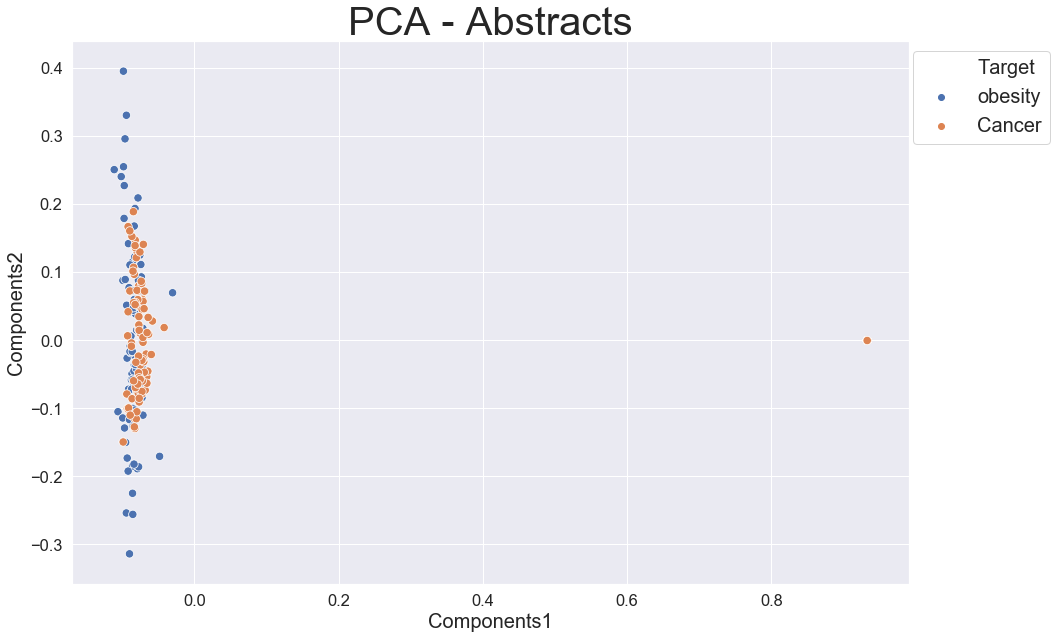

In [9]:
plot_scatter(df_pca,"PCA - Abstracts")

In [210]:
x = pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names())
y = articlesPD["target"].values

## tSNE + SVM

In [20]:
# initialise the tSNE object
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=300)

# fit and transform and generate the required dataframe
df_tsne = tsne.fit_transform(X)
df_tsne =pd.DataFrame(df_tsne) 

df_tsne.columns = ['X1', 'X2']
df_tsne["Target"] = articlesPD["target"].values

df_tsne

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.001s...
[t-SNE] Computed neighbors for 200 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.238327
[t-SNE] KL divergence after 300 iterations: 2.045865


X1         X2   Target
0    -4.487734  -3.729656  obesity
1     3.316578  -3.180727  obesity
2   -17.183416  16.275724  obesity
3   -22.827990 -12.132906  obesity
4   -21.346056  -8.529063  obesity
..         ...        ...      ...
195 -25.385258  -2.953974   Cancer
196  13.275098   0.400419   Cancer
197  -3.549580  -3.665202   Cancer
198  13.844618  -0.309324   Cancer
199   6.930993  -3.264284   Cancer

[200 rows x 3 columns]

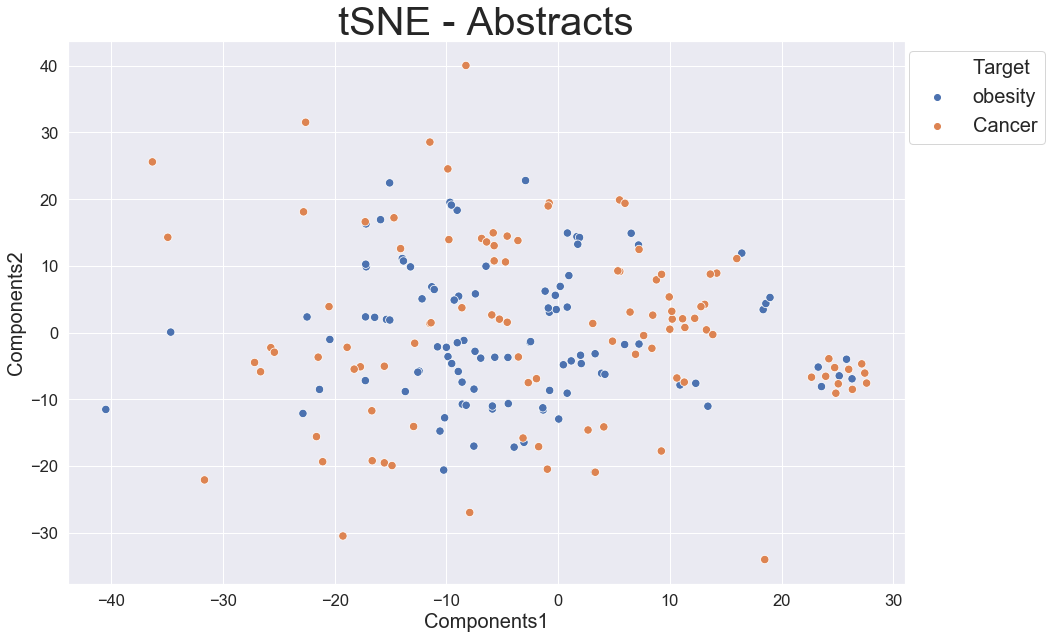

In [21]:
plot_scatter(df_tsne,"tSNE - Abstracts")

In [34]:
tsne = TSNE(n_components=2, verbose=0, perplexity=100, n_iter=400)

# fit and transform and generate the required dataframe
df_tsne = tsne.fit_transform(X)
df_tsne =pd.DataFrame(df_tsne) 

df_tsne.columns = ['X1', 'X2']
df_tsne["Target"] = articlesPD["target"].values

df_tsne

X1        X2   Target
0   -1.092579 -2.276155  obesity
1    0.269426 -1.970166  obesity
2    0.624419  0.378399  obesity
3    2.128298  0.577983  obesity
4    2.444459  1.037825  obesity
..        ...       ...      ...
195  0.049128  2.192462   Cancer
196 -1.913897 -1.837809   Cancer
197 -1.356200 -2.782371   Cancer
198 -2.034994 -2.007311   Cancer
199 -1.567910 -2.673566   Cancer

[200 rows x 3 columns]

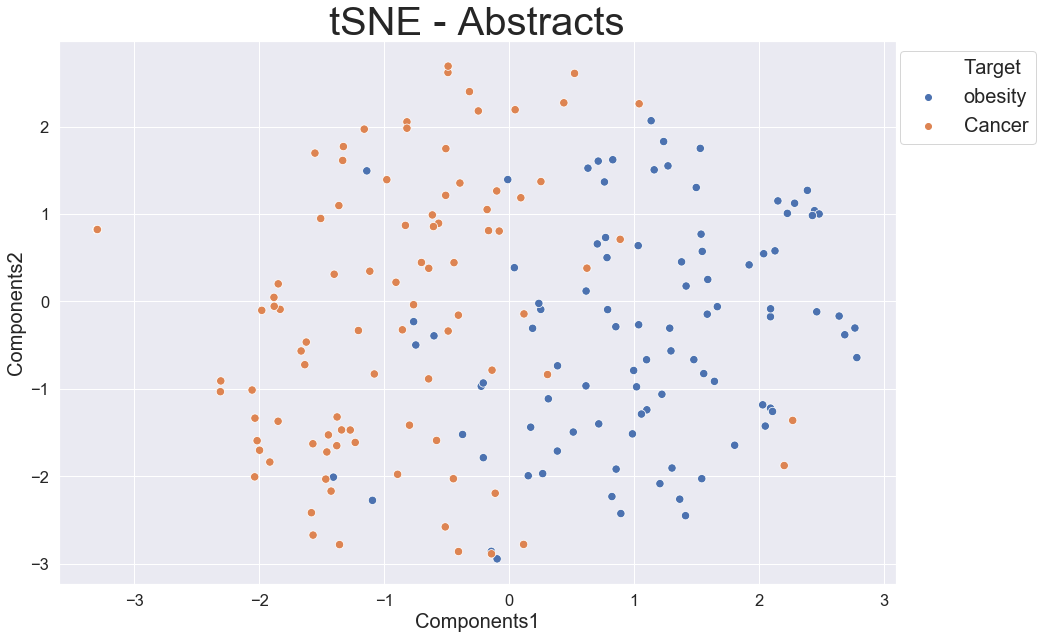

In [35]:
plot_scatter(df_tsne,"tSNE - Abstracts")

## tSNE + PCA

In [119]:
pca_3 = PCA(n_components=3)
pca_result_3 = pca_3.fit_transform(x)
tsne = TSNE(random_state = 42, n_components=3,verbose=2, perplexity=100, n_iter=400).fit_transform(pca_result_3)

[t-SNE] Computing 183 nearest neighbors...
[t-SNE] Indexed 184 samples in 0.005s...
[t-SNE] Computed neighbors for 184 samples in 0.042s...
[t-SNE] Computed conditional probabilities for sample 184 / 184
[t-SNE] Mean sigma: 0.136980
[t-SNE] Computed conditional probabilities in 0.027s
[t-SNE] Iteration 50: error = 73.1352234, gradient norm = 0.2638828 (50 iterations in 0.068s)
[t-SNE] Iteration 100: error = 95.7849960, gradient norm = 0.2059022 (50 iterations in 0.044s)
[t-SNE] Iteration 150: error = 107.7214661, gradient norm = 0.1734377 (50 iterations in 0.064s)
[t-SNE] Iteration 200: error = 115.1145172, gradient norm = 0.1433371 (50 iterations in 0.064s)
[t-SNE] Iteration 250: error = 117.5325394, gradient norm = 0.1568772 (50 iterations in 0.060s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 117.532539
[t-SNE] Iteration 300: error = 2.0001545, gradient norm = 0.0003836 (50 iterations in 0.064s)
[t-SNE] Iteration 350: error = 1.6771636, gradient norm = 0.0001

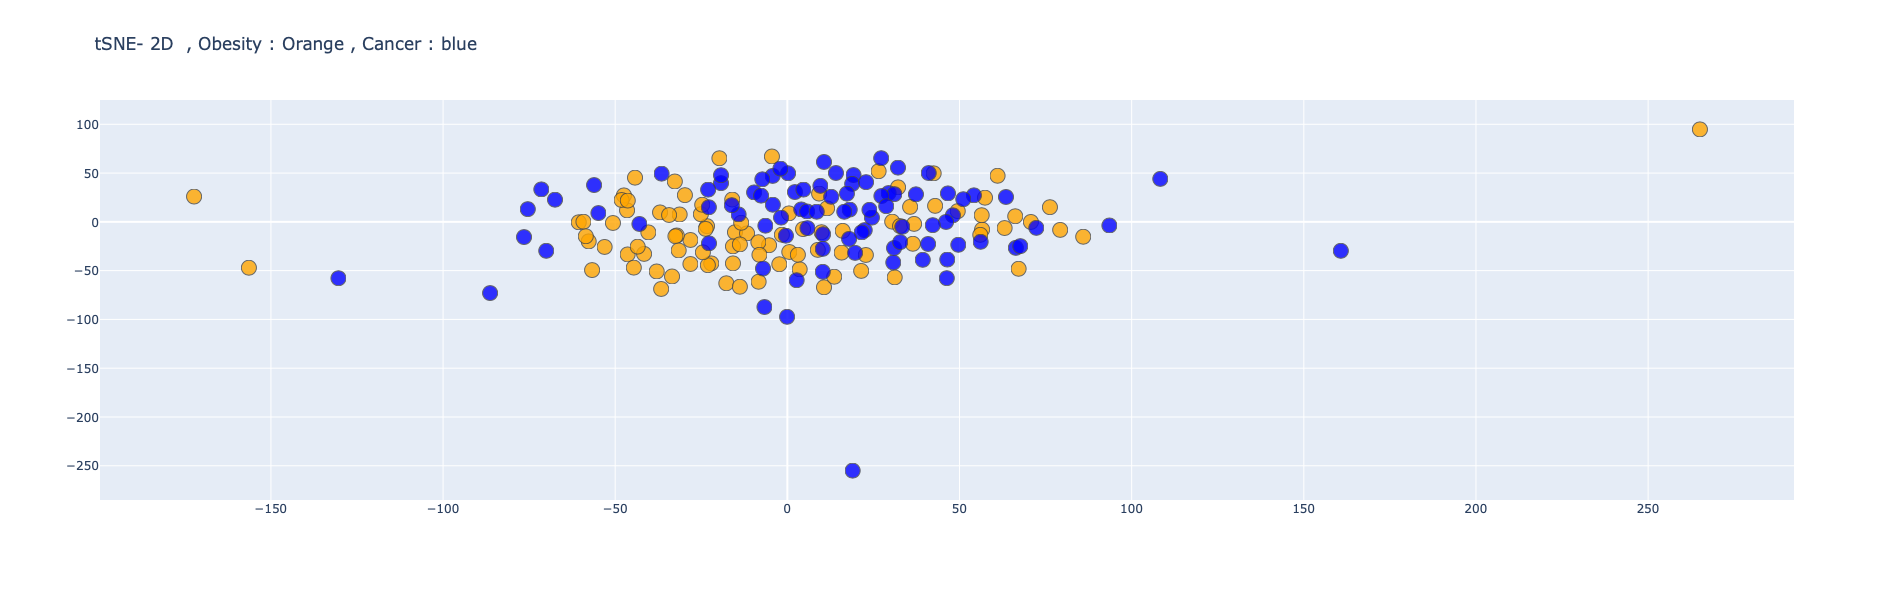

In [120]:
plot_2d(tsne[:, 0],tsne[:, 1], "tSNE- 2D  , Obesity : Orange , Cancer : blue")

In [42]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x)
tsne = TSNE(random_state = 42, n_components=3,verbose=2, perplexity=100, n_iter=400).fit_transform(pca_result_50)


[t-SNE] Computing 199 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.000s...
[t-SNE] Computed neighbors for 200 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 0.371190
[t-SNE] Computed conditional probabilities in 0.016s
[t-SNE] Iteration 50: error = 74.4918823, gradient norm = 0.2978093 (50 iterations in 0.057s)
[t-SNE] Iteration 100: error = 92.7652054, gradient norm = 0.2132279 (50 iterations in 0.045s)
[t-SNE] Iteration 150: error = 111.6531525, gradient norm = 0.2005348 (50 iterations in 0.038s)
[t-SNE] Iteration 200: error = 124.4365768, gradient norm = 0.1353067 (50 iterations in 0.039s)
[t-SNE] Iteration 250: error = 131.2200623, gradient norm = 0.1133901 (50 iterations in 0.058s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 131.220062
[t-SNE] Iteration 300: error = 2.4593911, gradient norm = 0.0003848 (50 iterations in 0.038s)
[t-SNE] Iteration 350: error = 2.0849504, gradient norm = 0.0001

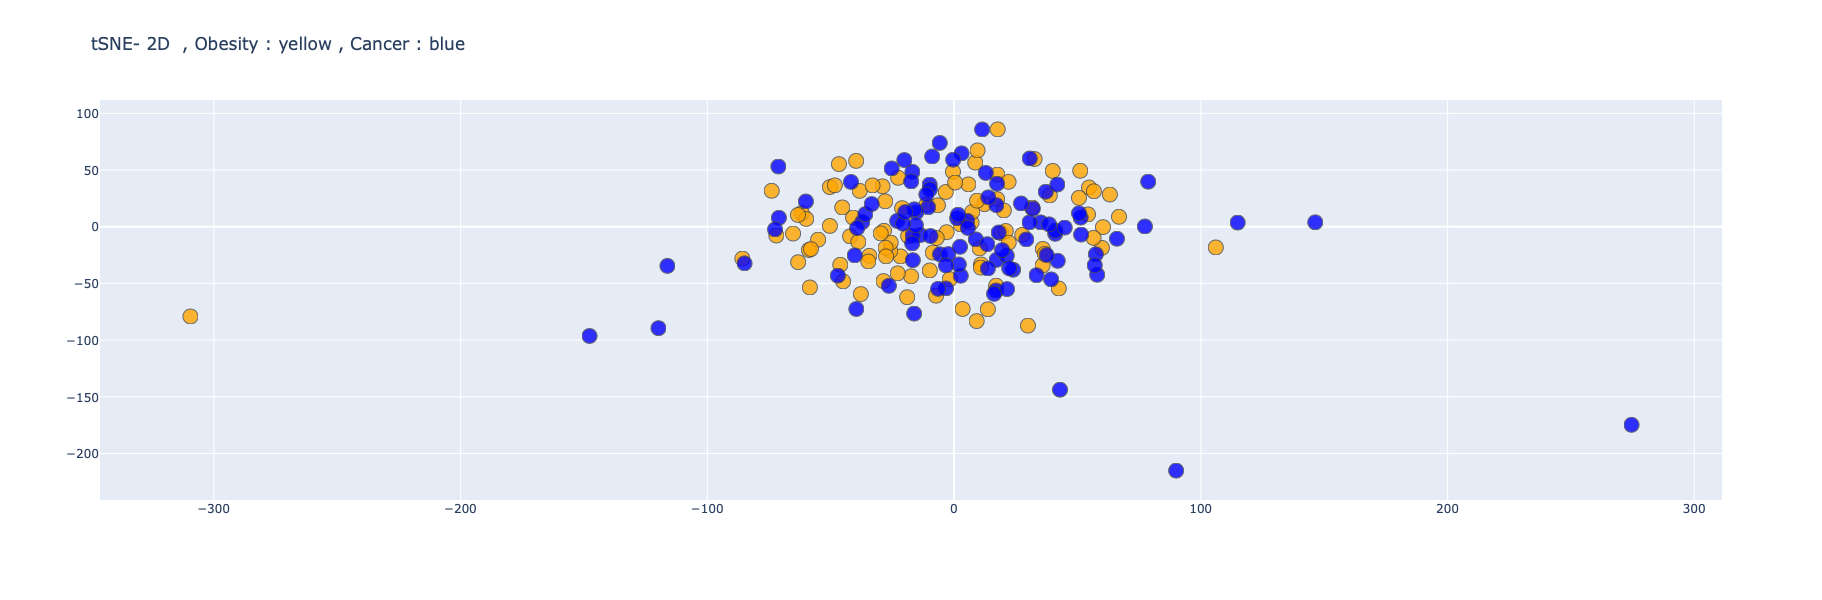

In [43]:
plot_2d(tsne[:, 0],tsne[:, 1], "tSNE- 2D  , Obesity : Orange , Cancer : blue")

In [80]:

tsne = TSNE( n_components=3,verbose=0, perplexity=100, n_iter=400).fit_transform(X)


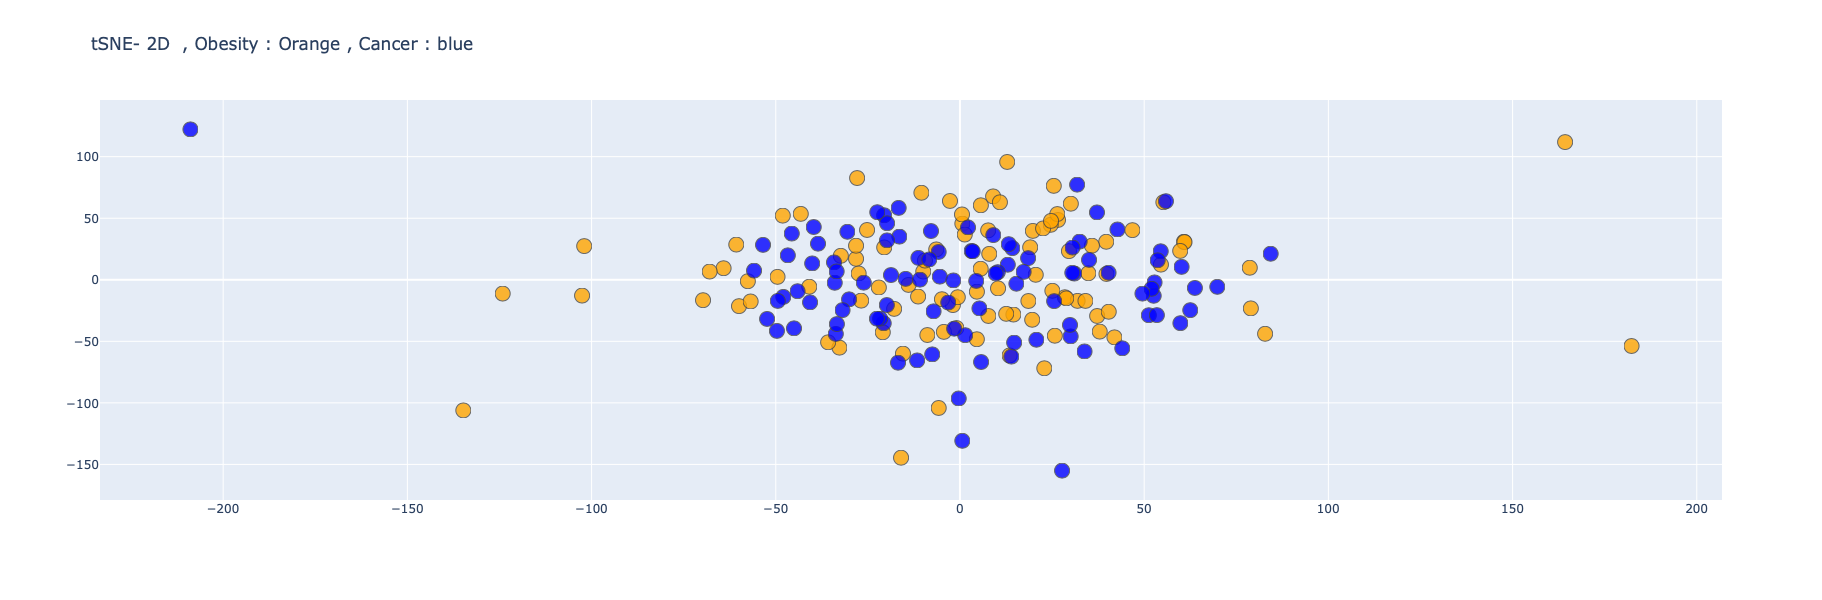

In [81]:
plot_2d(tsne[:, 0],tsne[:, 1], "tSNE- 2D  , Obesity : Orange , Cancer : blue")

## Using TSNEVisualizer

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


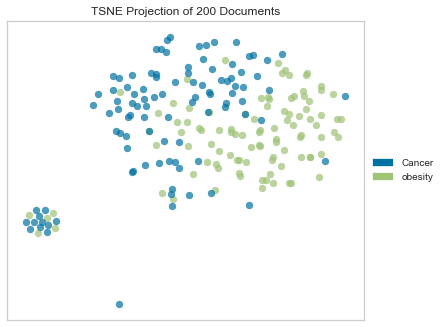

In [46]:
from yellowbrick.text import TSNEVisualizer
tsne = TSNEVisualizer(decompose_by=1000,decompose='svd')
tsne.fit(X, y)
tsne.show()

## UMAP

In [48]:
import umap

Umap = umap.UMAP(random_state=42,n_components=2)
df_umap = Umap.fit_transform(X)
df_umap =pd.DataFrame(df_umap)

df_umap.columns = ['X1','X2']

df_umap["Target"] = articlesPD["target"].values

df_umap

X1        X2   Target
0    2.858164  3.858362  obesity
1    5.404801  2.999816  obesity
2    6.306217  5.318318  obesity
3    6.569999  6.454461  obesity
4    7.078882  6.398341  obesity
..        ...       ...      ...
195  3.413624  5.733278   Cancer
196  2.862012  3.210613   Cancer
197  2.835144  3.792523   Cancer
198  2.955765  3.340895   Cancer
199  2.587047  3.506820   Cancer

[200 rows x 3 columns]

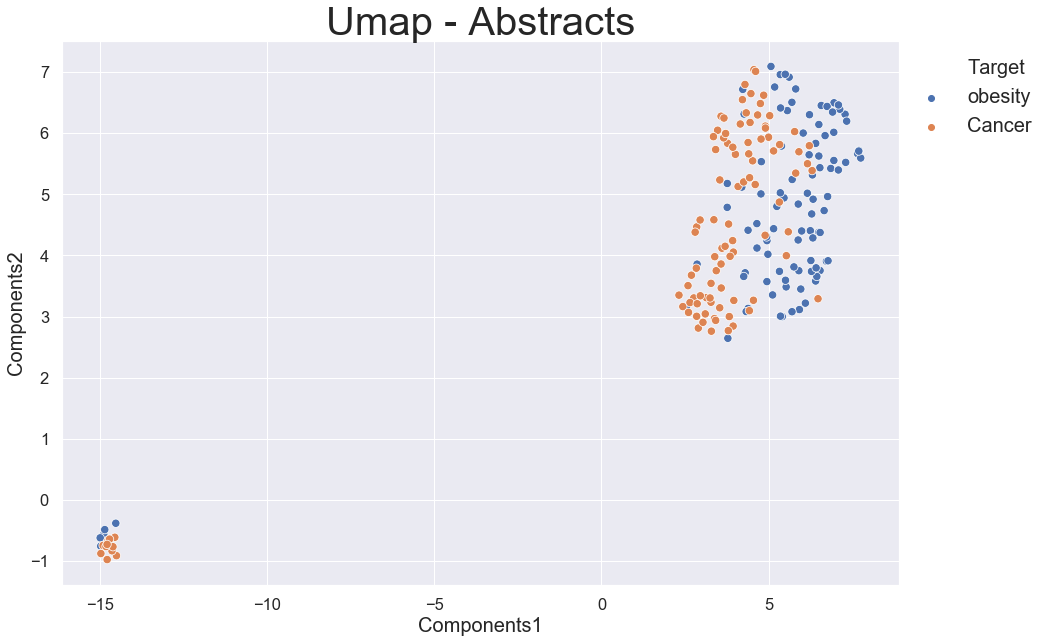

In [49]:
plot_scatter(df_umap,"Umap - Abstracts")

In [50]:
reducer = umap.UMAP(random_state=42,n_components=3)
embedding = reducer.fit_transform(x)

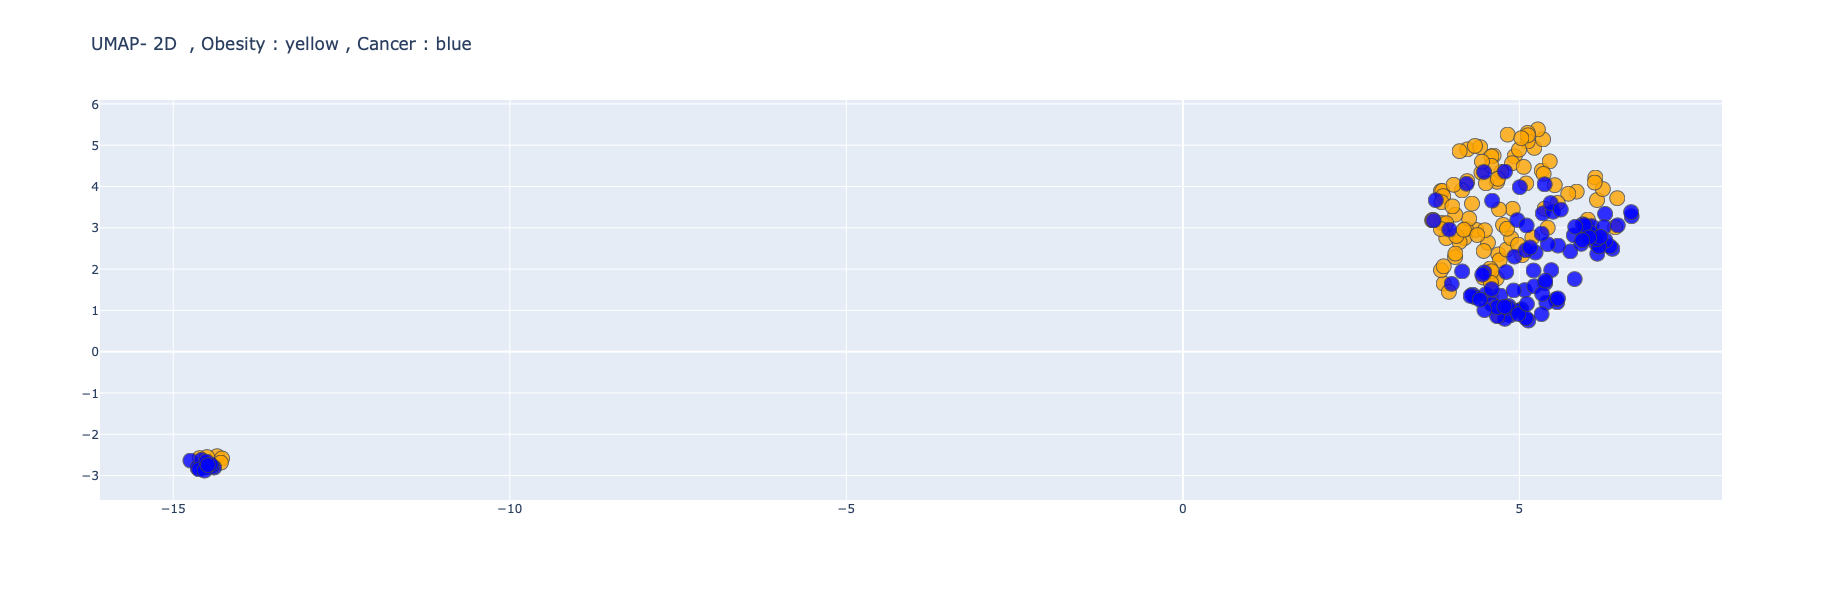

In [51]:
import umap
reducer = umap.UMAP(random_state=42,n_components=3)
embedding = reducer.fit_transform(x)
plot_2d(reducer.embedding_[:, 0],reducer.embedding_[:, 1], "UMAP- 2D  , Obesity : yellow , Cancer : blue")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


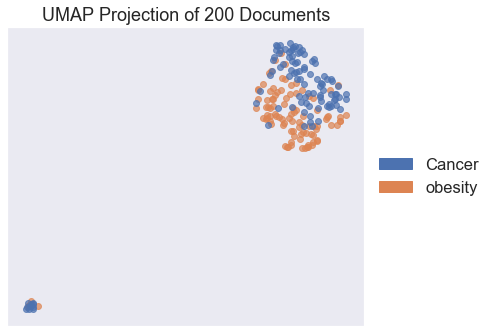

In [53]:
from yellowbrick.text import UMAPVisualizer

# Instantiate the text visualizer
umap = UMAPVisualizer()
umap.fit(X,y)
umap.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


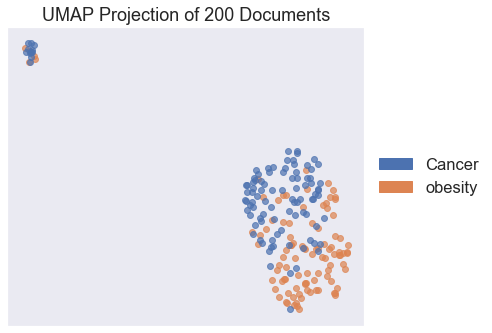

In [54]:

umap = UMAPVisualizer(metric='cosine')
umap.fit(X,y)
umap.show()

In [215]:
articlesPD.head(20)

Unnamed: 0  pubmed_id                                              title  \
0            0   33862466  High-mobility group box 2 protein is essential...   
1            1   33862459  Gut microbial short-chain fatty acids-mediated...   
2            2   33862414  Kidney cancer mortality disparities among Hisp...   
3            3   33862377  Effects of locomotion task constraints on runn...   
4            4   33862325  Multimodal brain predictors of current weight ...   
5            5   33862225  Maternal and perinatal risk factors for pediat...   
6            6   33862221  AMPK signaling and its targeting in cancer pro...   
7            7   33862146  Association of metabolites with obesity based ...   
8            8   33862034  Metabolically healthy obesity increases the pr...   
9            9   33862029  Converging vulnerability factors for compulsiv...   
10          10   33862025  The Challenges of Interpreting BMI in Children...   
11          11   33861936  Shinan Sea Salt Intake Ameliorates Colorectal ...   
12          12   33861860  Dysfunctional Brain Reward System in Child Obe...   
13          13   33861844  Role of macrophage autophagy in atherosclerosi...   
14          14   33861804  CT-based determination of excessive visceral a...   
15          15   33861726  Hyperbaric oxygen therapy effectively alleviat...   
16          16   33861539  Simultaneous Small/Medium Umbilical Hernia Rep...   
17          17   33861444  Medicinal Plants and Phytochemicals Regulating...   
18          18   33861434  The Effect of Curcumin Phytosome on the Treatm...   
19          19   33861432  The Effect of Curcumin Supplementation on Puls...   

                                             abstract   target  \
0   Understanding of the mechanism of adipogenesis...  obesity   
1   Olfactory receptor 78 (Olfr78), which is also ...  obesity   
2   Kidney cancer incidence is increasing among Hi...  obesity   
3   Childhood obesity adversely affects the muscul...  obesity   
4   Multimodal neuroimaging assessments were utili...  obesity   
5   Non-alcoholic fatty liver disease (NAFLD) has ...  obesity   
6   The intrinsic mechanisms sensing the imbalance...  obesity   
7   Previous genome-wide association analyses for ...  obesity   
8   Debate over the cardio-cerebrovascular risk as...  obesity   
9   Highly palatable foods and substance of abuse ...  obesity   
10                                                NaN  obesity   
11  The anticancer effects of Shinan (Shinan-South...  obesity   
12  Eating habits leading to obesity may reflect n...  obesity   
13  Atherosclerosis is a chronic inflammatory dise...  obesity   
14  Obesity is a negative prognostic factor for va...  obesity   
15  Currently, the prevalence of obesity in aging ...  obesity   
16  Periumbilical hernias are a common finding in ...  obesity   
17  Diabetes is a major health problem affecting m...  obesity   
18  Non-alcoholic fatty liver disease (NAFLD) is a...  obesity   
19  Cardiovascular disease is a leading cause of d...  obesity   

                                          title_clean  \
0   highmobility group box protein essential early...   
1   gut microbial shortchain fatty acidsmediated o...   
2   kidney cancer mortality disparity among hispan...   
3   effect locomotion task constraint running boy ...   
4   multimodal brain predictor current weight weig...   
5   maternal perinatal risk factor pediatric nonal...   
6   ampk signaling targeting cancer progression tr...   
7   association metabolite obesity based two gene ...   
8   metabolically healthy obesity increase prevale...   
9   converging vulnerability factor compulsive foo...   
10           challenge interpreting bmi child obesity   
11  shinan salt intake ameliorates colorectal canc...   
12    dysfunctional brain reward system child obesity   
13  role macrophage autophagy atherosclerosis modu...   
14  ctbased determination excessive visceral adipo...   
15  hyperbaric oxygen th

In [216]:
articlesPD.loc[articlesPD['abstract_clean'] == "none"]

Unnamed: 0  pubmed_id                                              title  \
10           10   33862025  The Challenges of Interpreting BMI in Children...   
32           32   33860463  Severe Protein Malnutrition After Bariatric Su...   
57           57   33859431  The STEP 1 trial for weight loss: a step chang...   
74           74   33858840  Consequences of covid-19 on the childhood obes...   
77           77   33858748  Research highlights of the 2020 society of uro...   
102           2   33862656  Choking with a snare to control immediate blee...   
103           3   33862653  A new therapy for refractory gastric cancer bl...   
110          10   33862587  Corrigendum to 'A chemical genetic screen iden...   
111          11   33862586  In response to the Letter to the Editor by Rom...   
119          19   33862562  Pulmonary Metastasectomy in Colorectal Cancer ...   
120          20   33862561  Genetic and epigenetic regulation in neoplasms...   
130          30   33862521  Somatic NF1 mutations in pituitary adenomas: R...   
150          50   33862335  COVID-related upsurge in diagnoses of advanced...   
153          53   33862297  Surgical classification of radical temporal bo...   
156          56   33862258  A commentary on "Intraoperative maneuvers may ...   
189          89   33861999  Are we already in the era of total neoadjuvant...   

    abstract   target                                        title_clean  \
10       NaN  obesity           challenge interpreting bmi child obesity   
32       NaN  obesity  severe protein malnutrition bariatric surgery ...   
57       NaN  obesity  step trial weight loss step change treating ob...   
74       NaN  obesity       consequence covid childhood obesity epidemic   
77       NaN  obesity  research highlight society urologic oncology y...   
102      NaN   Cancer  choking snare control immediate bleeding cold ...   
103      NaN   Cancer  new therapy refractory gastric cancer bleeding...   
110      NaN   Cancer  corrigendum chemical genetic screen identifies...   
111      NaN   Cancer  response letter editor romach et publication d...   
119      NaN   Cancer  pulmonary metastasectomy colorectal cancer pul...   
120      NaN   Cancer  genetic epigenetic regulation neoplasm compose...   
130      NaN   Cancer  somatic nf mutation pituitary adenoma report t...   
150      NaN   Cancer  covidrelated upsurge diagnosis advanced breast...   
153      NaN   Cancer  surgical classification radical temporal bone ...   
156      NaN   Cancer  commentary intraoperative maneuver may affect ...   
189      NaN   Cancer  already total neoadjuvant treatment rectal cancer   

    abstract_clean  
10            none  
32            none  
57            none  
74            none  
77            none  
102           none  
103           none  
110           none  
111           none  
119           none  
120           none  
130           none  
150           none  
153           none  
156           none  
189           none

In [217]:
df = articlesPD[articlesPD.abstract_clean != "none"]

In [218]:
df.shape

(184, 7)

In [219]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Load the data and create document vectors

tfidf = TfidfVectorizer()

X = tfidf.fit_transform(df['abstract_clean'].values)
y = df["target"].values

In [220]:
pca =IncrementalPCA(n_components=2,whiten=False,batch_size=50)
pca_comp = pca.fit_transform(X)
df_pca = pd.DataFrame(pca_comp)
df_pca.columns = ['X1', 'X2']
df_pca["Target"] = y


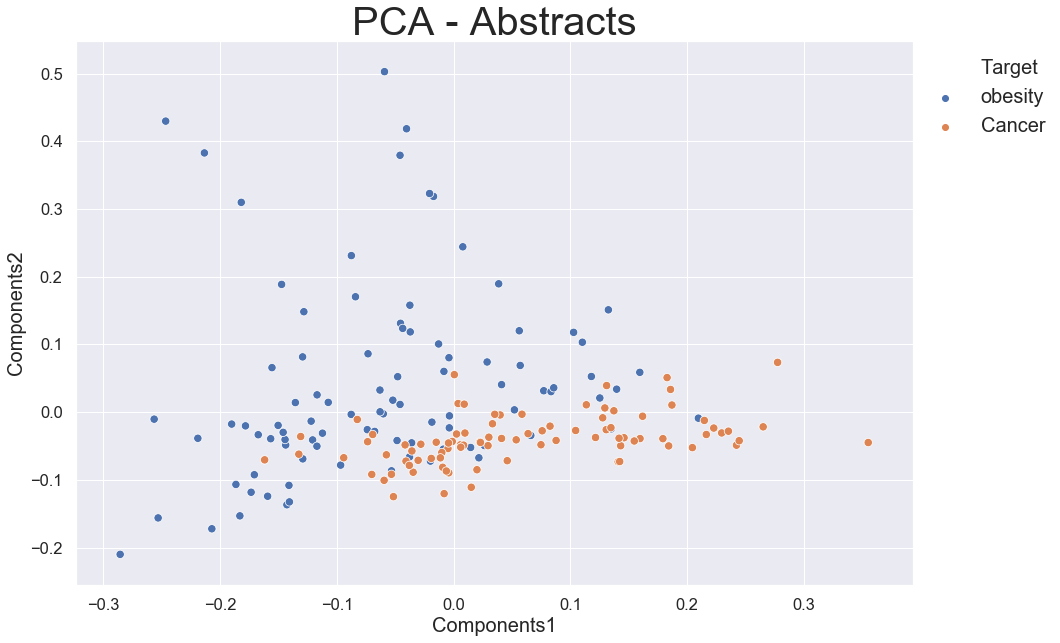

In [221]:
plot_scatter(df_pca,"PCA - Abstracts")

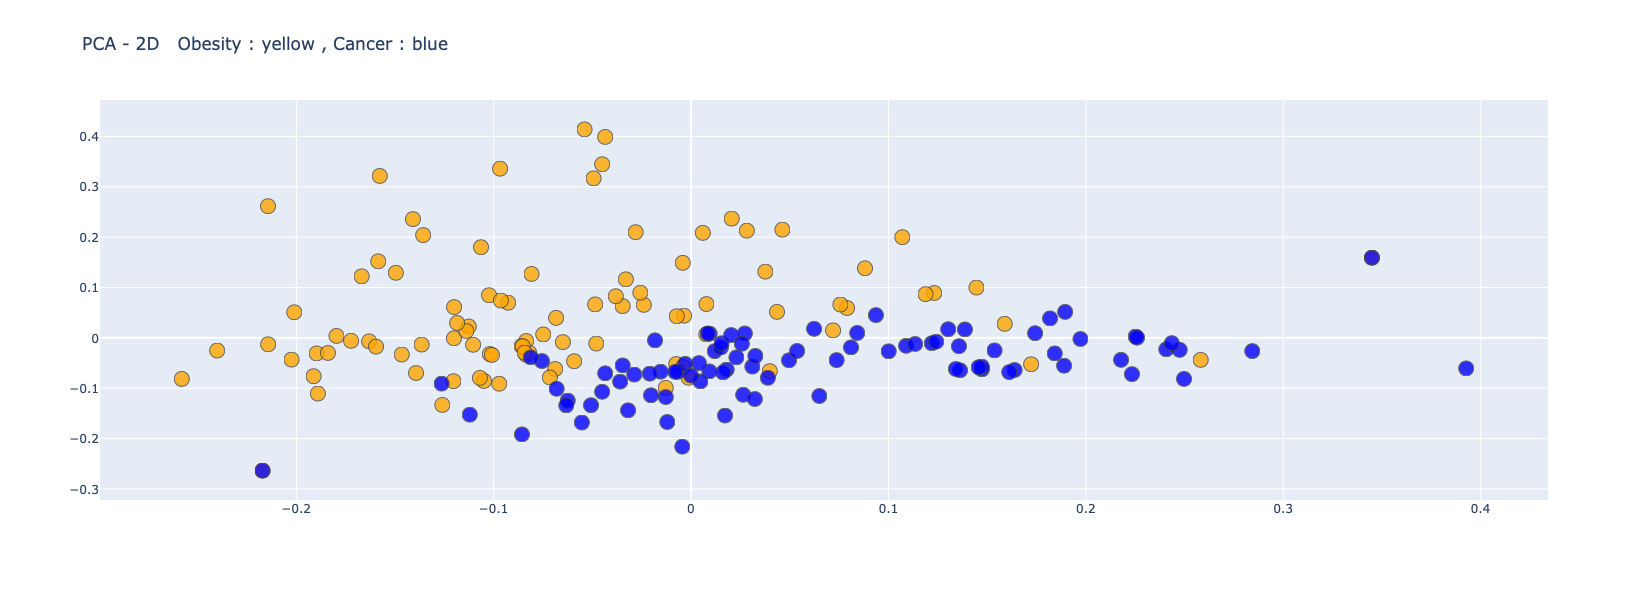

In [222]:

x = pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names())


ord_enc = OrdinalEncoder()
df["target01"] = ord_enc.fit_transform(df[["target"]])


pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)

principal = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4'])

plot_2d(principalComponents[:, 0],principalComponents[:, 1], "PCA - 2D   Obesity : yellow , Cancer : blue")

In [223]:
plot_3d(principalComponents[:, 0],principalComponents[:, 1],principalComponents[:, 2],"PCA - 3D Obesity : yellow , Cancer : blue")

In [224]:
# initialise the tSNE object
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=300)

# fit and transform and generate the required dataframe
df_tsne = tsne.fit_transform(X)
df_tsne =pd.DataFrame(df_tsne) 

df_tsne.columns = ['X1', 'X2']
df_tsne["Target"] = df["target"].values


[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 184 samples in 0.000s...
[t-SNE] Computed neighbors for 184 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 184 / 184
[t-SNE] Mean sigma: 0.190095
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.945000
[t-SNE] KL divergence after 300 iterations: 2.095340


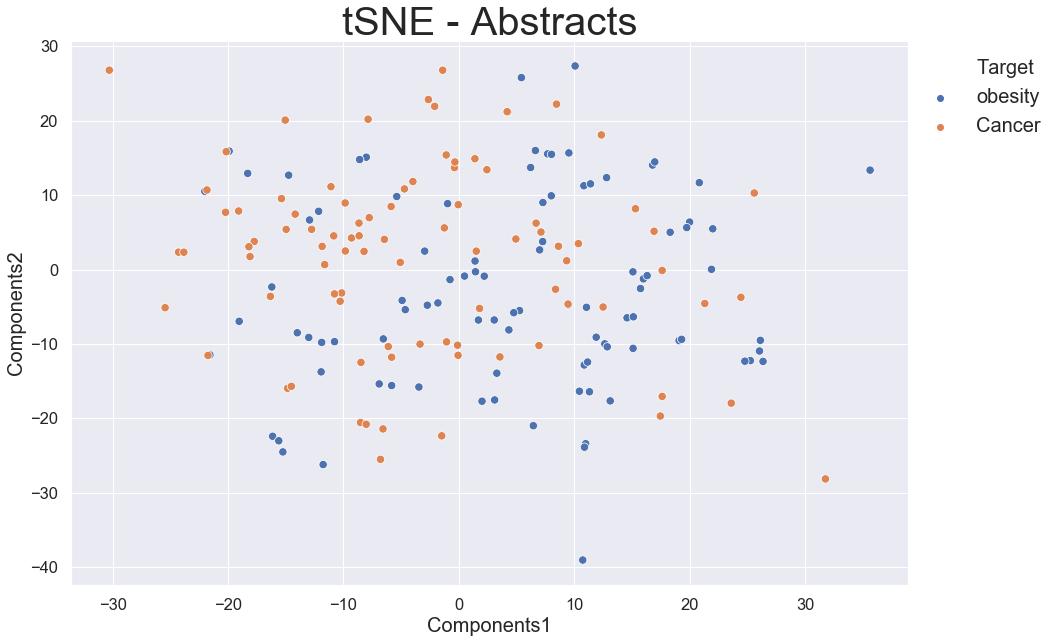

In [225]:
plot_scatter(df_tsne,"tSNE - Abstracts")

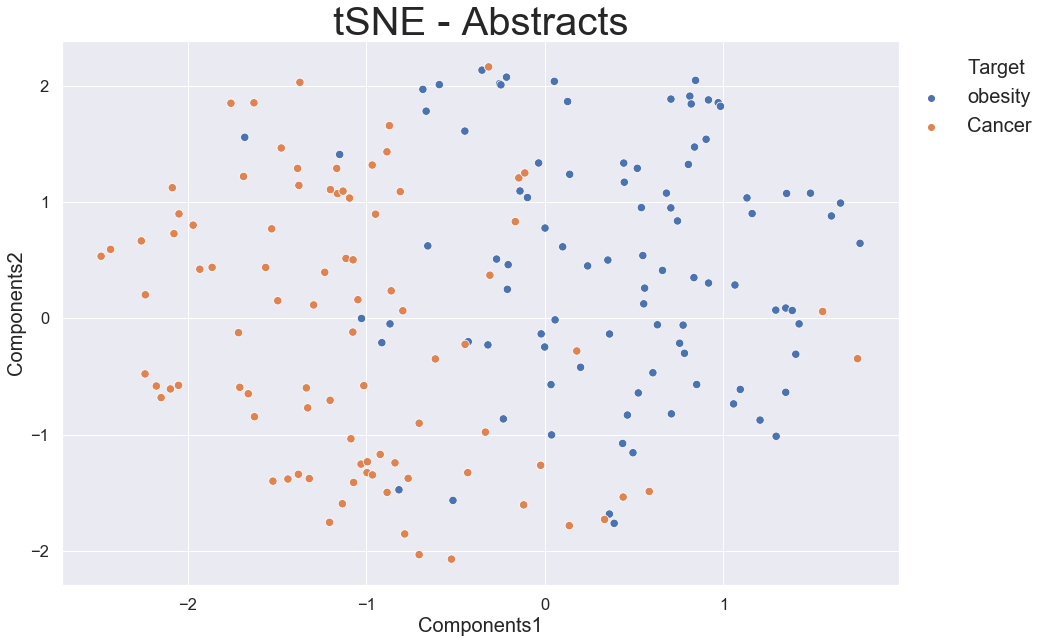

In [226]:
tsne = TSNE(n_components=2, verbose=0, perplexity=100, n_iter=400)

# fit and transform and generate the required dataframe
df_tsne = tsne.fit_transform(X)
df_tsne =pd.DataFrame(df_tsne) 

df_tsne.columns = ['X1', 'X2']
df_tsne["Target"] = df["target"].values

#df_tsne

plot_scatter(df_tsne,"tSNE - Abstracts")

[t-SNE] Computing 183 nearest neighbors...
[t-SNE] Indexed 184 samples in 0.000s...
[t-SNE] Computed neighbors for 184 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 184 / 184
[t-SNE] Mean sigma: 0.360630
[t-SNE] Computed conditional probabilities in 0.013s
[t-SNE] Iteration 50: error = 81.2337341, gradient norm = 0.2391048 (50 iterations in 0.066s)
[t-SNE] Iteration 100: error = 100.3033752, gradient norm = 0.2016769 (50 iterations in 0.060s)
[t-SNE] Iteration 150: error = 115.3320770, gradient norm = 0.1580357 (50 iterations in 0.056s)
[t-SNE] Iteration 200: error = 126.6182098, gradient norm = 0.1435238 (50 iterations in 0.057s)
[t-SNE] Iteration 250: error = 132.5391541, gradient norm = 0.1392479 (50 iterations in 0.057s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 132.539154
[t-SNE] Iteration 300: error = 2.5475798, gradient norm = 0.0003810 (50 iterations in 0.056s)
[t-SNE] Iteration 350: error = 2.1093988, gradient norm = 0.000

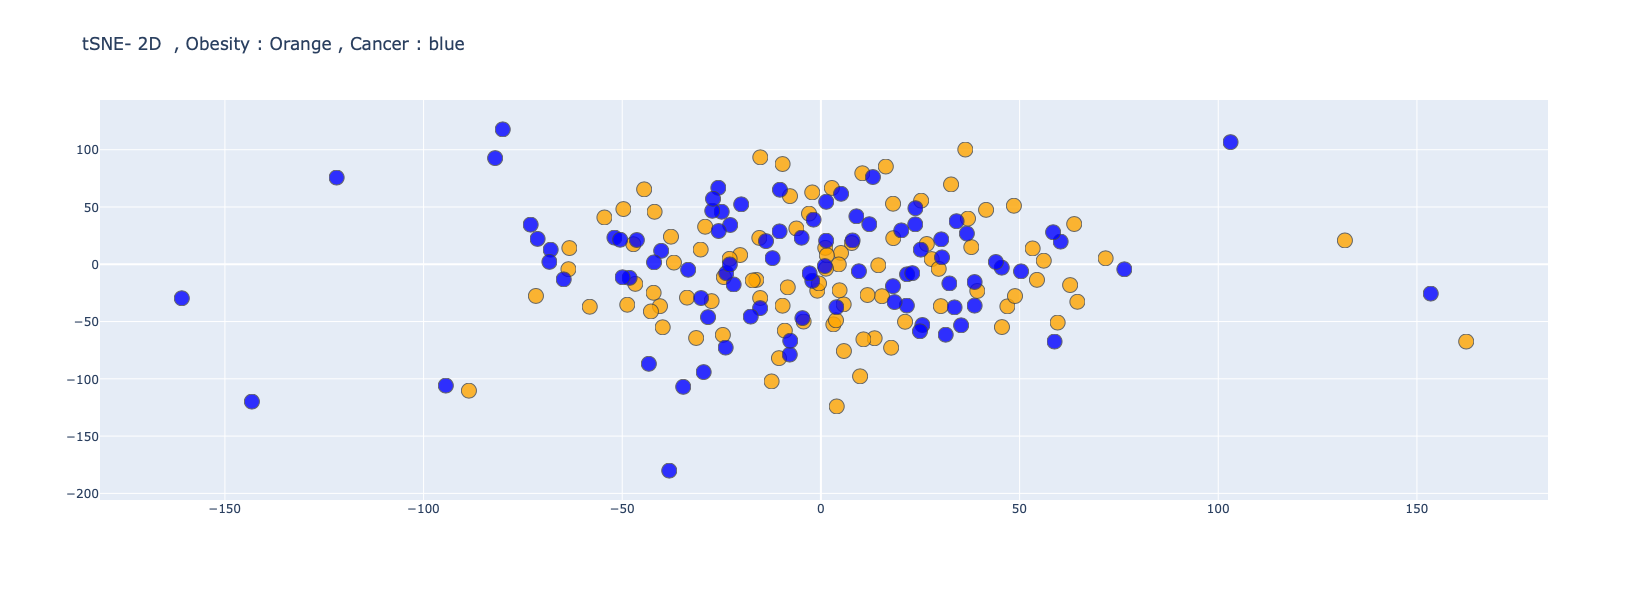

In [227]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x)
tsne = TSNE(random_state = 42, n_components=3,verbose=2, perplexity=100, n_iter=400).fit_transform(pca_result_50)

plot_2d(tsne[:, 0],tsne[:, 1], "tSNE- 2D  , Obesity : Orange , Cancer : blue")

In [228]:

plot_3d(tsne[:, 0],tsne[:, 1],tsne[:, 2], "tSNE- 3D  , Obesity : Orange , Cancer : blue")

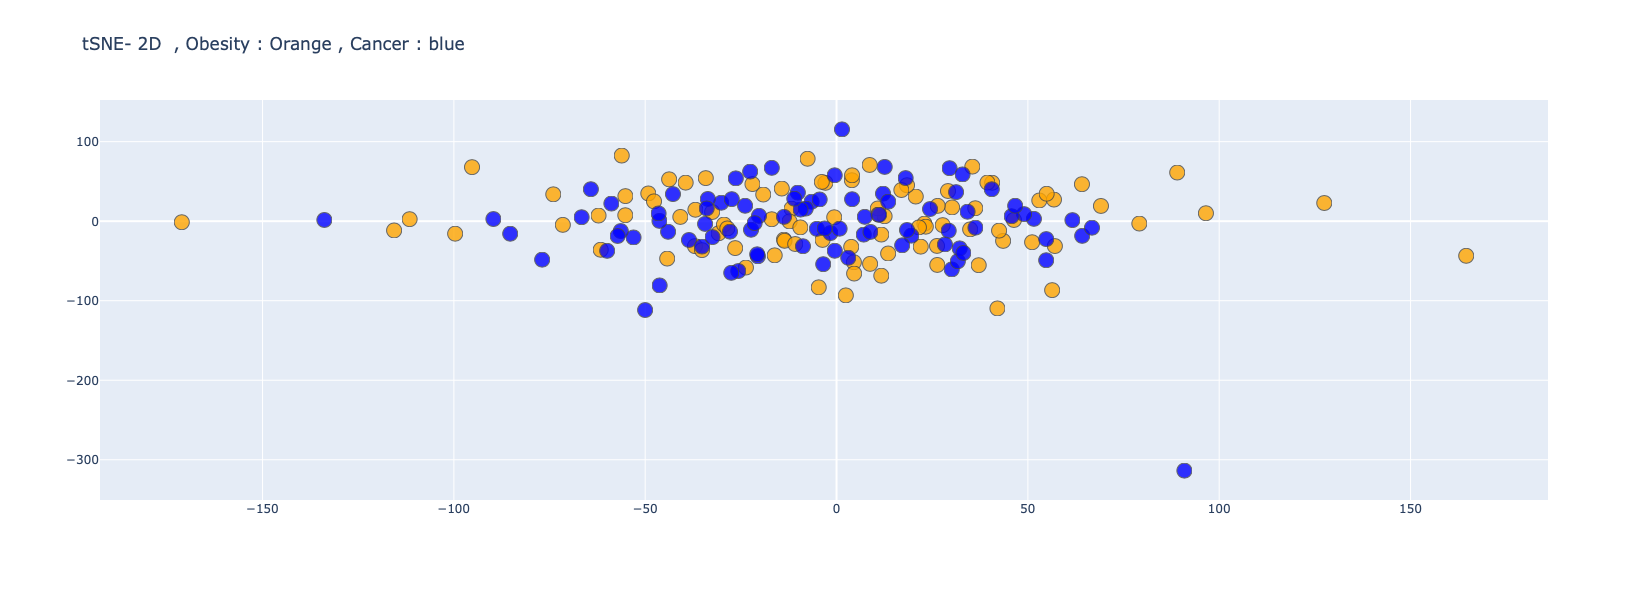

In [229]:
tsne = TSNE( n_components=3,verbose=0, perplexity=100, n_iter=400).fit_transform(X)


plot_2d(tsne[:, 0],tsne[:, 1], "tSNE- 2D  , Obesity : Orange , Cancer : blue")

In [230]:
plot_3d(tsne[:, 0],tsne[:, 1],tsne[:, 2], "tSNE- 3D  , Obesity : Orange , Cancer : blue")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


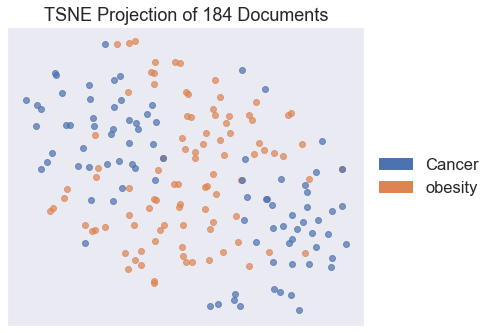

In [111]:
from yellowbrick.text import TSNEVisualizer
tsne = TSNEVisualizer(decompose_by=1000,decompose='svd')
tsne.fit(X, y)
tsne.show()


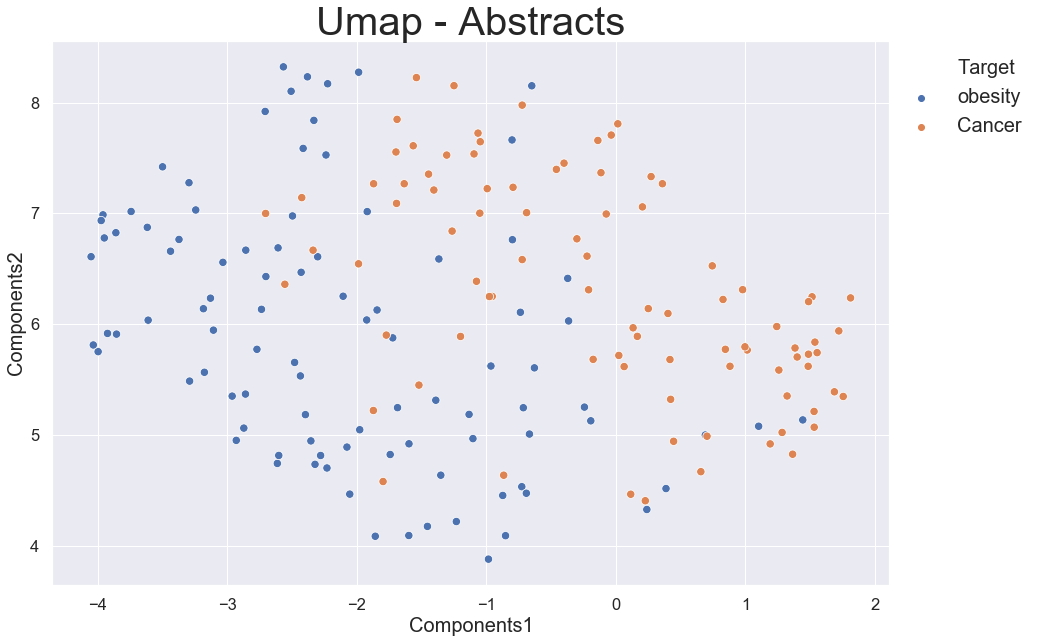

In [113]:
import umap

Umap = umap.UMAP(random_state=42,n_components=2)
df_umap = Umap.fit_transform(X)
df_umap =pd.DataFrame(df_umap)

df_umap.columns = ['X1','X2']

df_umap["Target"] = df["target"].values


plot_scatter(df_umap,"Umap - Abstracts")

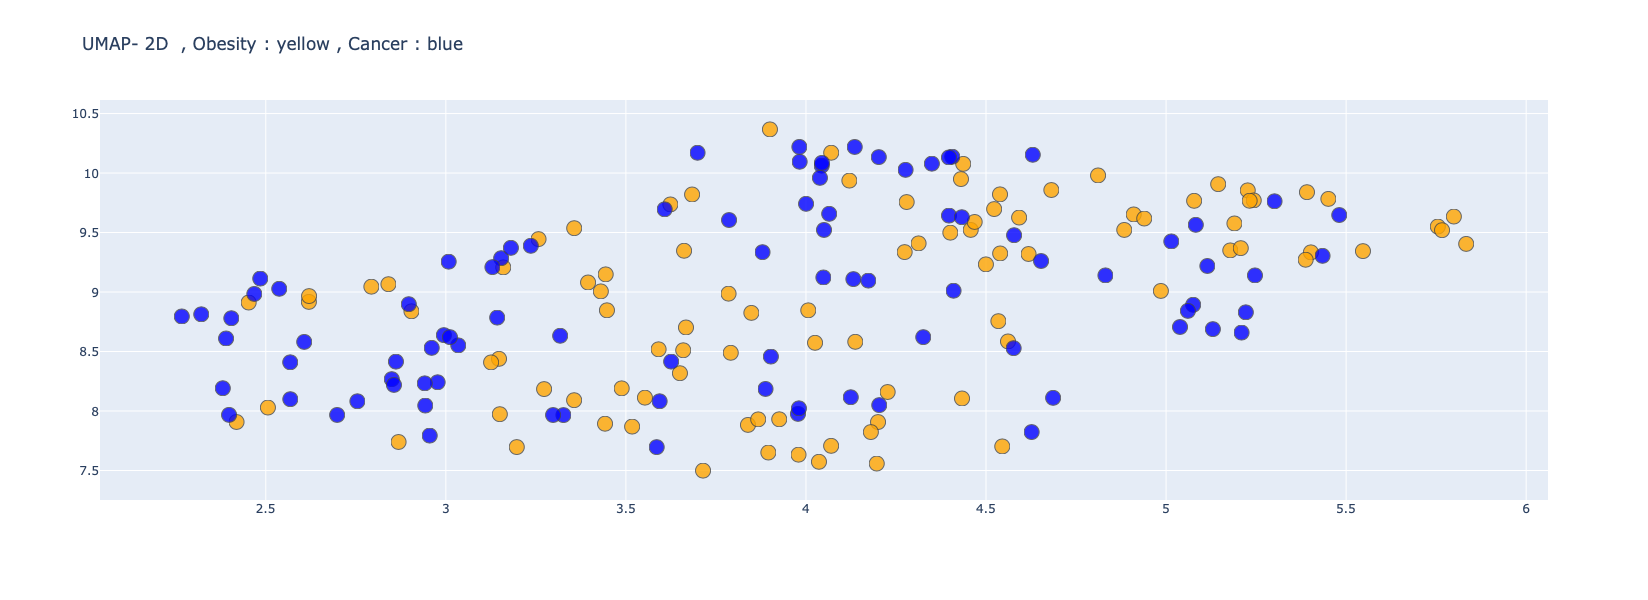

In [231]:
reducer = umap.UMAP(random_state=42,n_components=3)
embedding = reducer.fit_transform(x)


plot_2d(reducer.embedding_[:, 0],reducer.embedding_[:, 1], "UMAP- 2D  , Obesity : yellow , Cancer : blue")


In [232]:
plot_3d(reducer.embedding_[:, 0],reducer.embedding_[:, 1],reducer.embedding_[:, 2], "UMAP- 3D  , Obesity : yellow , Cancer : blue")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


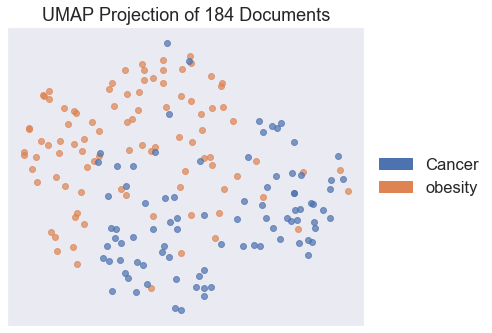

In [116]:

from yellowbrick.text import UMAPVisualizer

# Instantiate the text visualizer
umap = UMAPVisualizer()
umap.fit(X,y)
umap.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


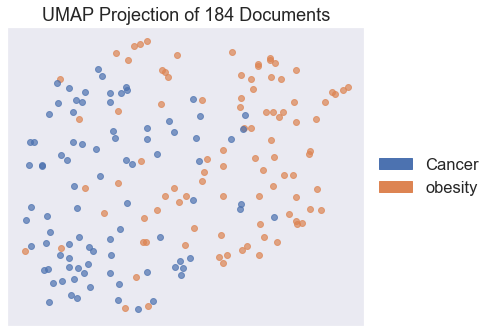

In [117]:

umap = UMAPVisualizer(metric='cosine')
umap.fit(X,y)
umap.show()

In [126]:
corpus_df = pd.DataFrame({'Document': df['abstract_clean'] , 
                          'Category': df['target']})
corpus_df = corpus_df[['Document', 'Category']]
corpus_df.head()

Document Category
0  understanding mechanism adipogenesis essential...  obesity
1  olfactory receptor olfr also known receptor sh...  obesity
2  kidney cancer incidence increasing among hispa...  obesity
3  childhood obesity adversely affect musculoskel...  obesity
4  multimodal neuroimaging assessment utilized id...  obesity

## word2vec

In [127]:
from gensim.models import word2vec

wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in corpus_df['Document']]

# Set values for various parameters
feature_size = 10    # Word vector dimensionality  
window_context = 10          # Context window size                                                                                    
min_word_count = 1   # Minimum word count                        
sample = 1e-3   # Downsample setting for frequent words

w2v_model = word2vec.Word2Vec(tokenized_corpus, size=feature_size, 
                              window=window_context, min_count = min_word_count,
                              sample=sample, iter=100)

In [128]:
def average_word_vectors(words, model, vocabulary, num_features):
    
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.
    
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model[word])
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector
    
   
def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)


# get document level embeddings
w2v_feature_array = averaged_word_vectorizer(corpus=tokenized_corpus, model=w2v_model,
                                             num_features=feature_size)
pd.DataFrame(w2v_feature_array)

0         1         2         3         4         5         6  \
0    0.027984  0.665855  3.556038  0.967605  0.967664  1.405515  1.430795   
1   -0.618754  0.360014  4.734088  0.652606  1.220811  1.280485  2.011470   
2   -0.959764  1.616723  1.532572 -2.182562 -2.255306 -0.471290 -2.549522   
3   -1.400631  0.343039  1.852837 -0.940440  0.360561  1.434330 -2.940984   
4   -0.980300  0.524046  1.835257  0.142686 -0.948752  1.480750 -2.251678   
..        ...       ...       ...       ...       ...       ...       ...   
179  1.510410  2.547889  3.458765  0.210852  1.579009  0.286737  0.082602   
180 -0.416300 -0.549397  2.573147  0.614970  2.124163  2.113755  2.345384   
181  0.009519 -0.932592  2.177895  0.726583  0.481091  0.782476  1.624500   
182  1.291717 -0.097239  3.041686  0.464668  0.976533  1.070083  1.228047   
183  0.712807 -0.193295  2.966562  0.704111 -0.194483  2.444028  0.522347   

            7         8         9  
0    0.490903 -1.568595  0.546442  
1   -0.689516 -0.374979 -0.122262  
2    2.515087 -3.588227 -0.383554  
3   -1.024859 -0.819186 -2.037180  
4    0.338584 -0.363535 -2.151252  
..        ...       ...       ...  
179  0.400776 -1.024056  0.160274  
180  0.944115 -2.140600  0.921205  
181  1.279260 -0.807450 -0.526488  
182  0.985733 -0.848711  0.529896  
183  1.671199 -0.431336  0.896455  

[184 rows x 10 columns]

In [233]:
y = corpus_df["Category"].values

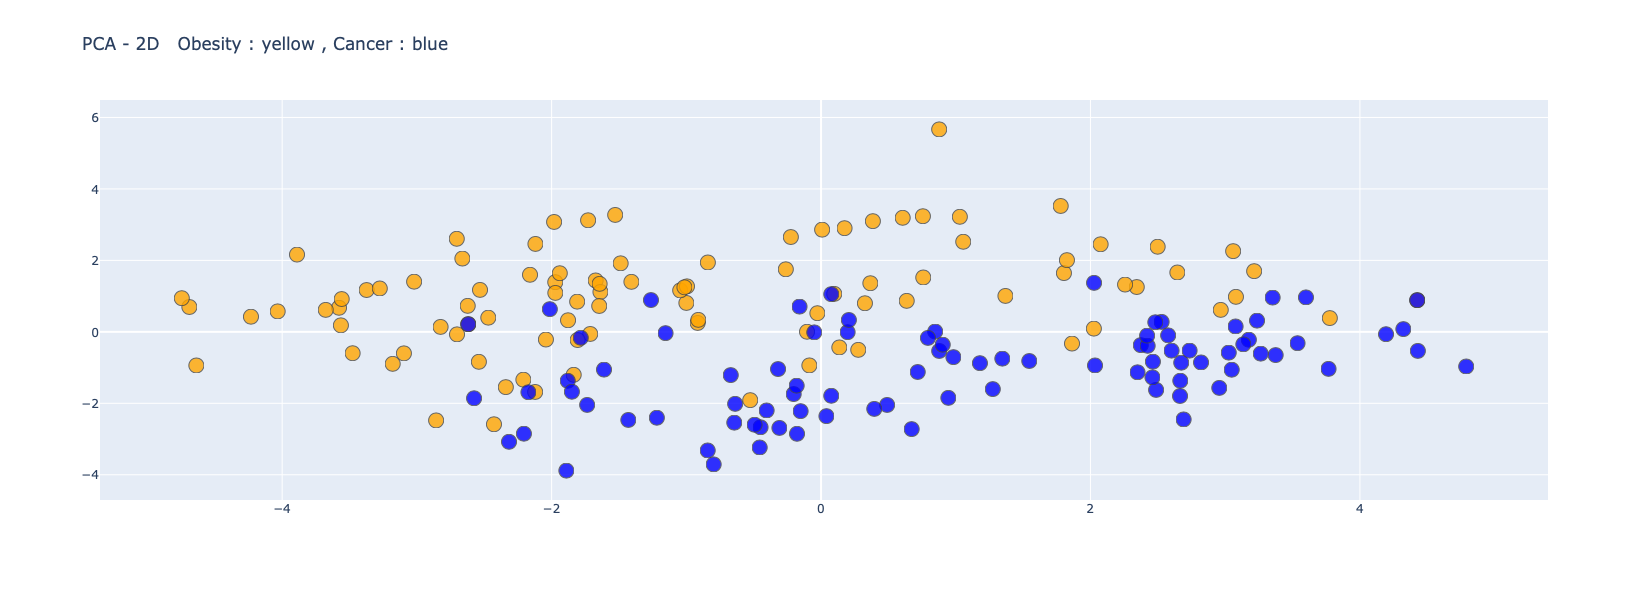

In [234]:
pca = PCA(n_components=3, random_state =0)
principalComponents = pca.fit_transform(w2v_feature_array)

principal = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3'])

plot_2d(principalComponents[:, 0],principalComponents[:, 1], "PCA - 2D   Obesity : yellow , Cancer : blue")

In [235]:
plot_3d(principalComponents[:, 0],principalComponents[:, 1],principalComponents[:, 2],"PCA - 3D Obesity : yellow , Cancer : blue")

In [236]:

tsne = TSNE(n_components=3, random_state=0, n_iter=5000, perplexity=3)
np.set_printoptions(suppress=True)
tsne= tsne.fit_transform(w2v_feature_array)

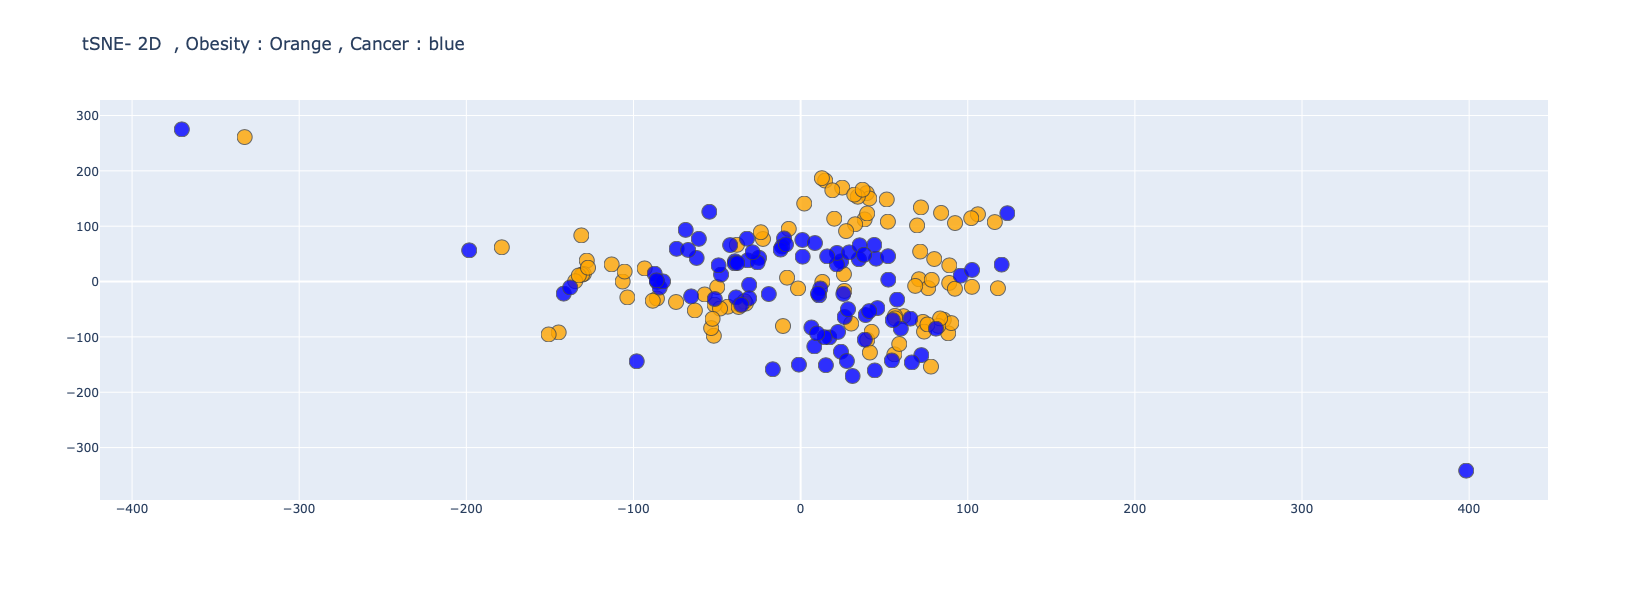

In [237]:
plot_2d(tsne[:, 0],tsne[:, 1], "tSNE- 2D  , Obesity : Orange , Cancer : blue")

In [238]:
plot_3d(tsne[:, 0],tsne[:, 1],tsne[:, 2], "tSNE- 3D  , Obesity : Orange , Cancer : blue")


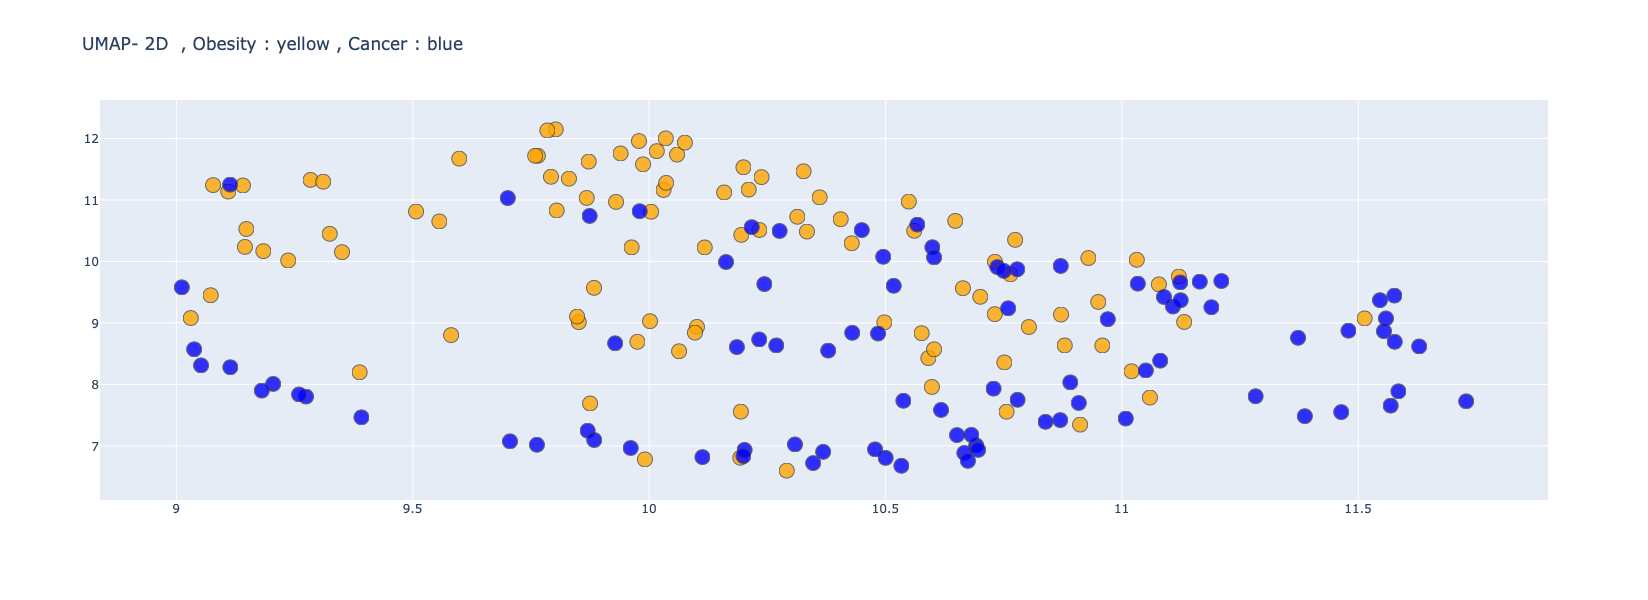

In [239]:
import umap
reducer = umap.UMAP(random_state=42,n_components=3)
embedding = reducer.fit_transform(w2v_feature_array)
plot_2d(reducer.embedding_[:, 0],reducer.embedding_[:, 1], "UMAP- 2D  , Obesity : yellow , Cancer : blue")

In [151]:
plot_3d(reducer.embedding_[:, 0],reducer.embedding_[:, 1],reducer.embedding_[:, 2], "UMAP- 3D  , Obesity : yellow , Cancer : blue")

## FastText

In [162]:
from gensim.models.fasttext import FastText

wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in corpus_df['Document']]

# Set values for various parameters
feature_size = 100    # Word vector dimensionality  
window_context = 5          # Context window size                                                                                    
min_word_count = 1   # Minimum word count                        
sample = 1e-3   # Downsample setting for frequent words

# sg skip-gram (1) or CBOW (0)
ft_model = FastText(tokenized_corpus, size=feature_size, window=window_context, 
                    min_count=min_word_count,sample=sample, sg=0, iter=50)

In [163]:
ft_feature_array = averaged_word_vectorizer(corpus=tokenized_corpus, model=ft_model,
                                             num_features=feature_size)
pd.DataFrame(ft_feature_array)

0         1         2         3         4         5         6   \
0   -0.224915 -0.337874  0.495638  0.327411  0.377665 -0.080039  0.195000   
1   -0.230729 -0.351600  0.431561  0.363345  0.403380 -0.128871  0.164874   
2    0.482928 -0.377807  0.115587  0.381200 -0.162533 -0.093058  0.256137   
3    0.469852 -0.593459 -0.145497  0.914606  0.042374 -0.151343  0.076937   
4    0.260068 -0.491418 -0.149558  0.739830  0.223125 -0.273609  0.201268   
..        ...       ...       ...       ...       ...       ...       ...   
179  0.101943 -0.519642  0.334895  0.407004  0.351504 -0.170765  0.150299   
180 -0.387100 -0.147886  0.543534  0.423424  0.429135 -0.049425  0.138045   
181 -0.177655 -0.352031  0.395244  0.537067  0.342572 -0.159698  0.042000   
182 -0.121028 -0.173042  0.457370  0.396070  0.343460 -0.008042  0.125131   
183 -0.290067 -0.523318  0.516850  0.578928  0.452359 -0.270496  0.080155   

           7         8         9   ...        90        91        92  \
0   -0.112826 -0.083253  0.370489  ...  0.552058 -0.029625 -0.807732   
1   -0.158159 -0.136637  0.409131  ...  0.534886 -0.091641 -0.728082   
2   -0.010149 -0.131823  0.016402  ...  0.066363  0.212794 -0.833156   
3   -0.171992 -0.206376  0.475997  ...  0.331873  0.091744 -0.486083   
4   -0.163059 -0.194319  0.513046  ...  0.201406  0.092948 -0.578010   
..        ...       ...       ...  ...       ...       ...       ...   
179  0.006917  0.024081  0.365885  ...  0.363839  0.068749 -0.727695   
180 -0.328127 -0.158614  0.379240  ...  0.860074 -0.083113 -0.618564   
181 -0.122408 -0.075990  0.430340  ...  0.600351 -0.103636 -0.504609   
182 -0.224629 -0.076501  0.382402  ...  0.613266  0.014186 -0.594011   
183  0.011202 -0.001732  0.525269  ...  0.513517 -0.081004 -0.608617   

           93        94        95        96        97        98        99  
0    0.274998 -0.254404 -0.289656 -0.272470 -0.000924 -0.204180  0.569068  
1    0.244219 -0.211557 -0.305076 -0.241756  0.063480 -0.225191  0.480441  
2   -0.050303 -0.531870  0.375881  0.293920  0.181720 -0.797715  0.402468  
3   -0.031817 -0.319128 -0.009400  0.099445  0.459805 -0.383145  0.217308  
4    0.019064 -0.344431 -0.029733  0.060962  0.257279 -0.256388  0.252768  
..        ...       ...       ...       ...       ...       ...       ...  
179  0.189096 -0.297619 -0.086892 -0.175883  0.022180 -0.240070  0.538697  
180  0.318181  0.008255 -0.467882 -0.293605 -0.043331 -0.062913  0.523486  
181  0.222682 -0.119472 -0.368260 -0.242372  0.073075 -0.047283  0.409206  
182  0.227370 -0.025029 -0.252393 -0.100698 -0.052680 -0.140824  0.485378  
183  0.292335 -0.282551 -0.384865 -0.459586 -0.045365  0.089899  0.505800  

[184 rows x 100 columns]

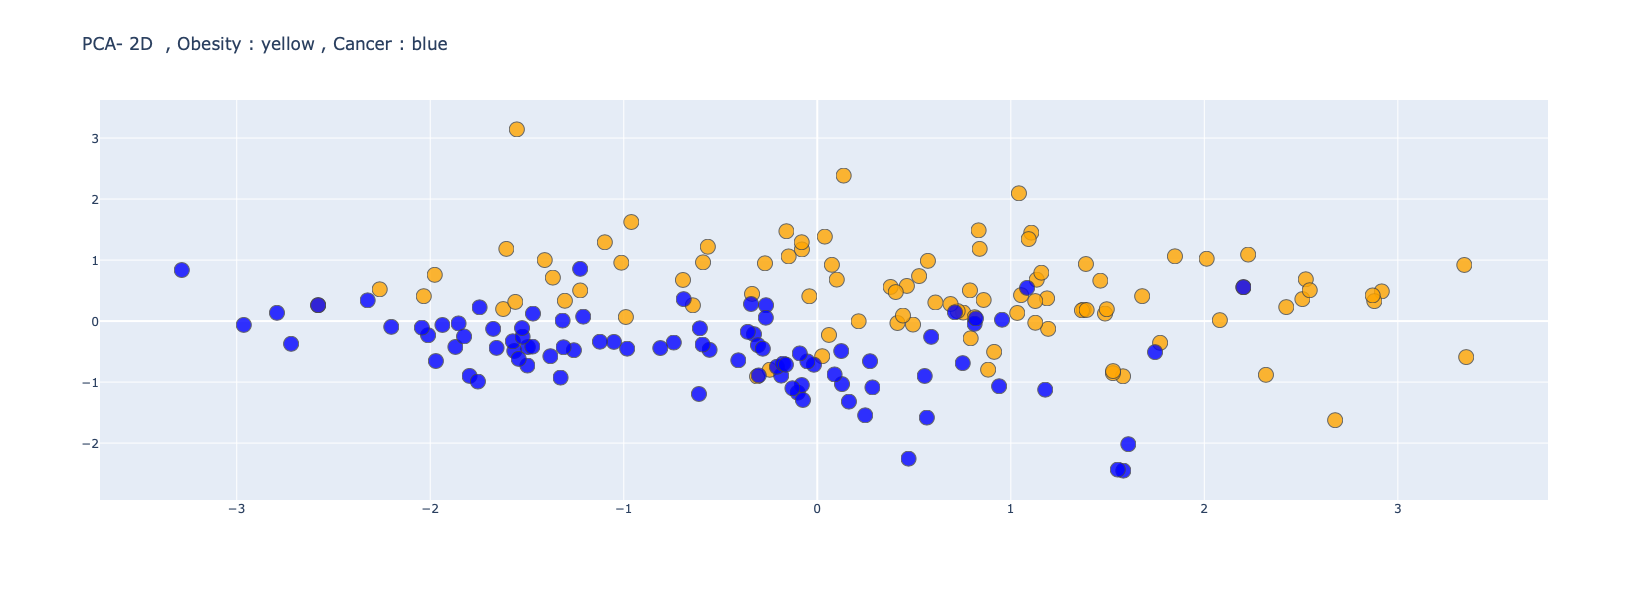

In [166]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(ft_feature_array)


principal = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3'])


plot_2d(principalComponents[:, 0],principalComponents[:, 1], "PCA- 2D  , Obesity : yellow , Cancer : blue")

In [167]:
plot_3d(principalComponents[:, 0],principalComponents[:, 1],principalComponents[:, 2], "PCA- 3D  , Obesity : yellow , Cancer : blue")

In [186]:
tsne = TSNE(n_components=3, random_state=0, n_iter=3000, perplexity=8)
np.set_printoptions(suppress=True)
tsne= tsne.fit_transform(ft_feature_array)

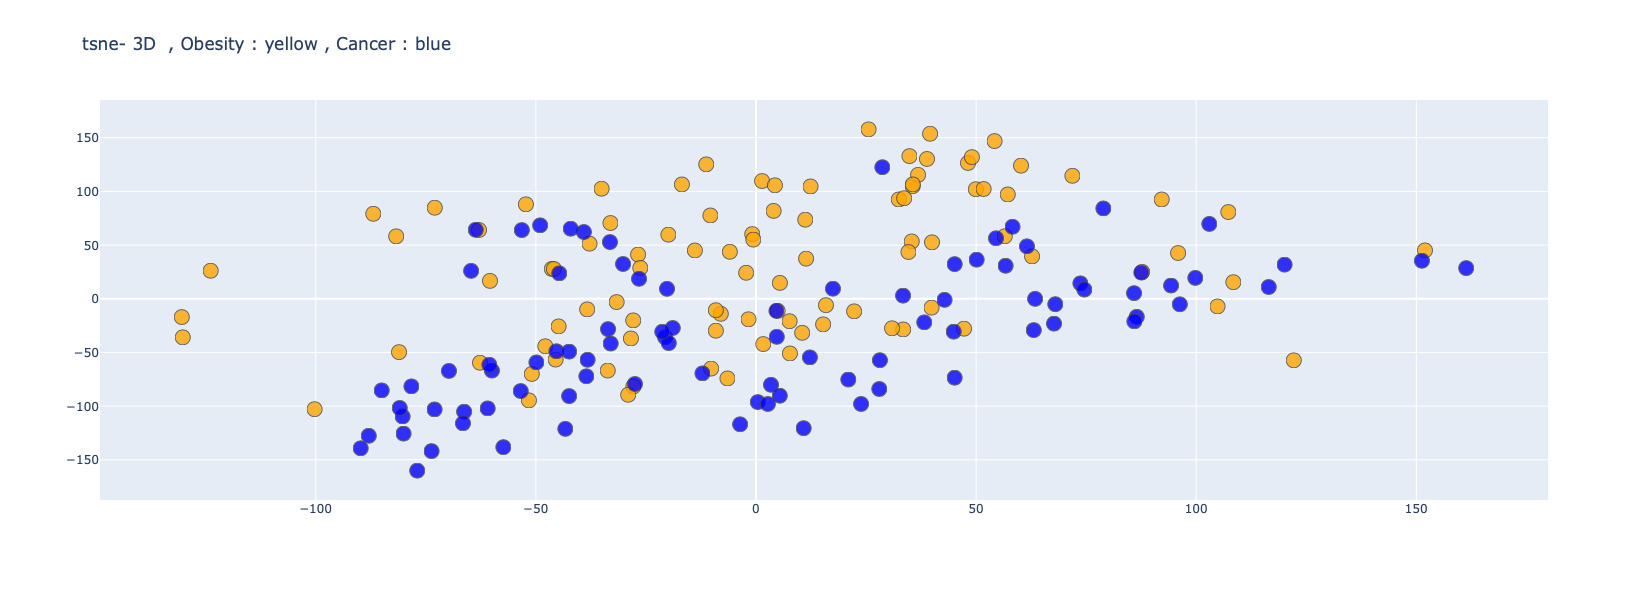

In [187]:
plot_2d(tsne[:, 0],tsne[:, 1], "tsne- 3D  , Obesity : yellow , Cancer : blue")

In [188]:
plot_3d(tsne[:, 0],tsne[:, 1],tsne[:, 2], "tsne- 3D  , Obesity : yellow , Cancer : blue")

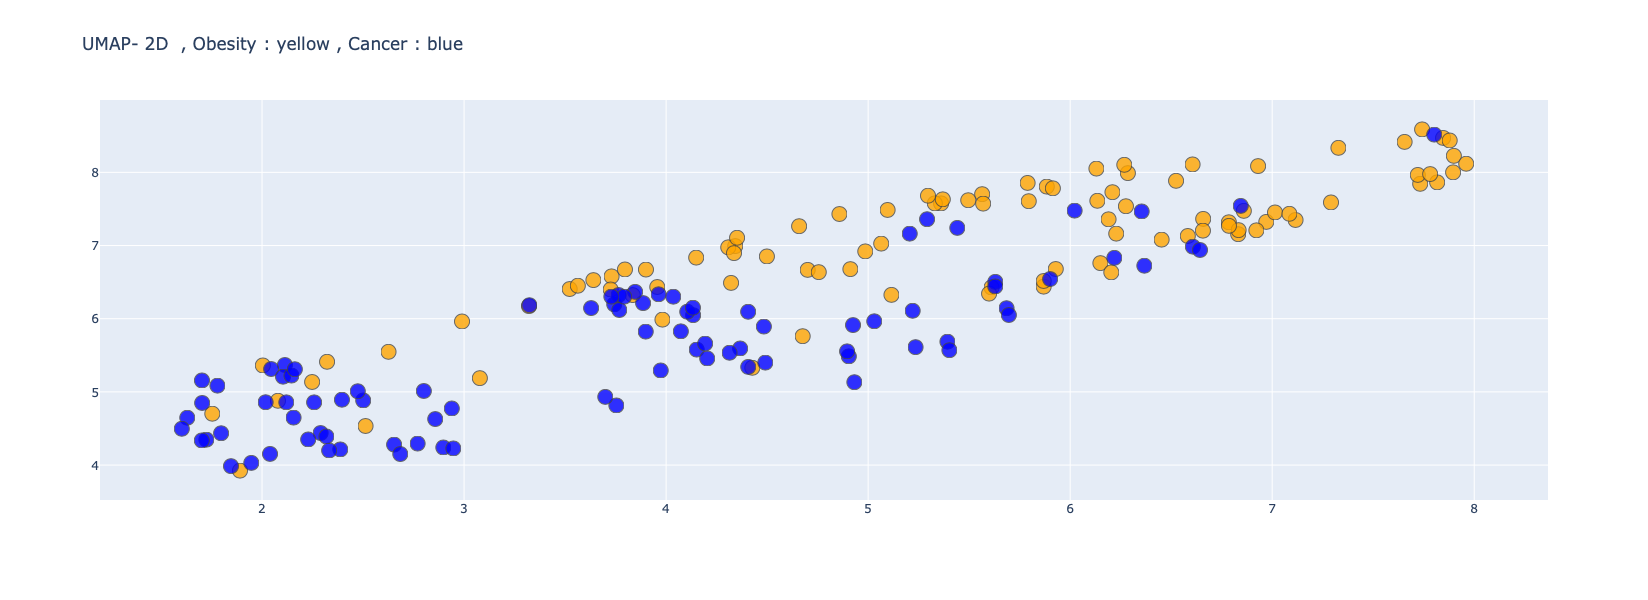

In [189]:
import umap
reducer = umap.UMAP(random_state=42,n_components=3)
embedding = reducer.fit_transform(ft_feature_array)
plot_2d(reducer.embedding_[:, 0],reducer.embedding_[:, 1], "UMAP- 2D  , Obesity : yellow , Cancer : blue")

In [190]:
plot_3d(reducer.embedding_[:, 0],reducer.embedding_[:, 1],reducer.embedding_[:, 2],"UMAP- 3D  , Obesity : yellow , Cancer : blue")

In [201]:
# view similar words based on gensim's FastText model
similar_words = {search_term: [item[0] for item in ft_model.wv.most_similar([search_term], topn=50)]
                  for search_term in ['Cancer','Obesity']}
#print(similar_words )  

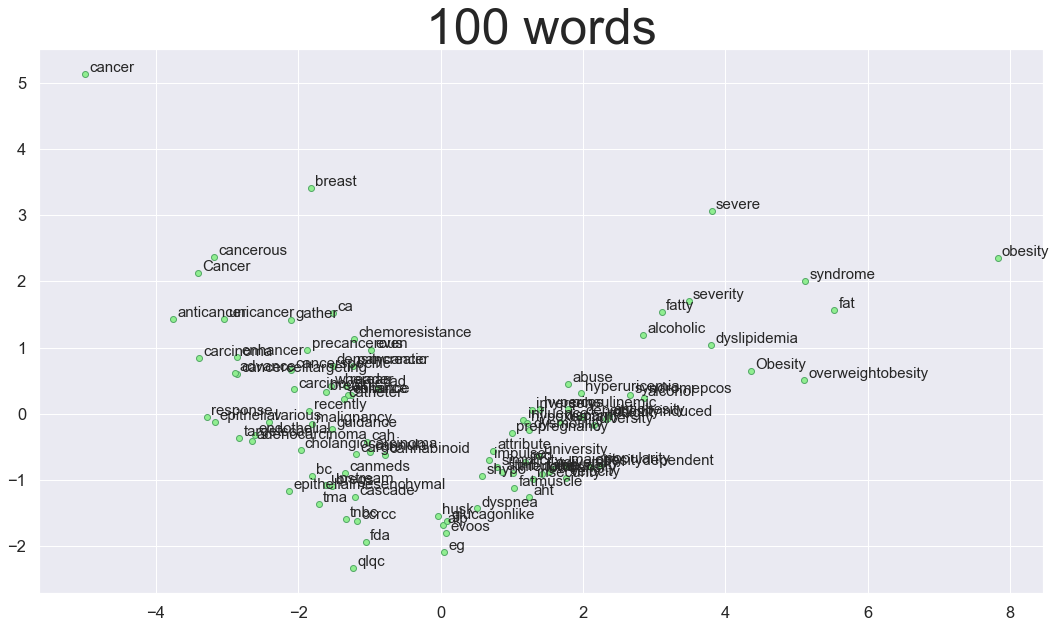

In [240]:
from sklearn.decomposition import PCA

words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = ft_model.wv[words]

pca = PCA(n_components=3)
np.set_printoptions(suppress=True)
P = pca.fit_transform(wvs)
labels = words

plt.figure(figsize=(18, 10))
plt.scatter(P[:, 0], P[:, 1], c='lightgreen', edgecolors='g')
for label, x, y in zip(labels, P[:, 0], P[:, 1]):
    plt.annotate(label, xy=(x+0.06, y+0.03), xytext=(0, 0), textcoords='offset points',fontsize=15)
plt.title('100 words',fontdict = {'fontsize' : 50})
plt.show()